## Valid Palindrome
Given a string s, return true if it is a palindrome, otherwise return false.

Constraints:
- 1 <= s.length <= 1000
- s is made up of only printable ASCII characters.
- Case insensitive and ignores non-aplhanumeric characters

Link to problem: https://leetcode.com/problems/valid-palindrome/description/

In [ ]:
# Solution 1: Avoided regex (wasn't sure if Leetcode allowed imports), avoided creating a reversed string. 
# Does use 2 pointers but it is less efficient than other solutions. I believe this is the result of cleaning first then comparing (iterating through the string twice)
# Also doesn't perform great for memory despite not craeting a reversed string. I believe this also comes from the cleaning of the string.
class Solution:
    def isPalindrome(self, s: str) -> bool:
        #print(s)
       
        # Clean string first (lowercase & only alphanumeric)
        s = ''.join(char.lower() for char in s if char.isalnum())
        
        #print(s)

        # Two pointers. One on first character one on last, if != then it is not a palindrome. Move both pointers inward and repeat.
        # This approach prevents creating a new reversed string - saves memory & time.
        for i in range(0,len(s)//2):
            if s[i] != s[(len(s)-1-i)]:
                return False
        

        return True

Results:

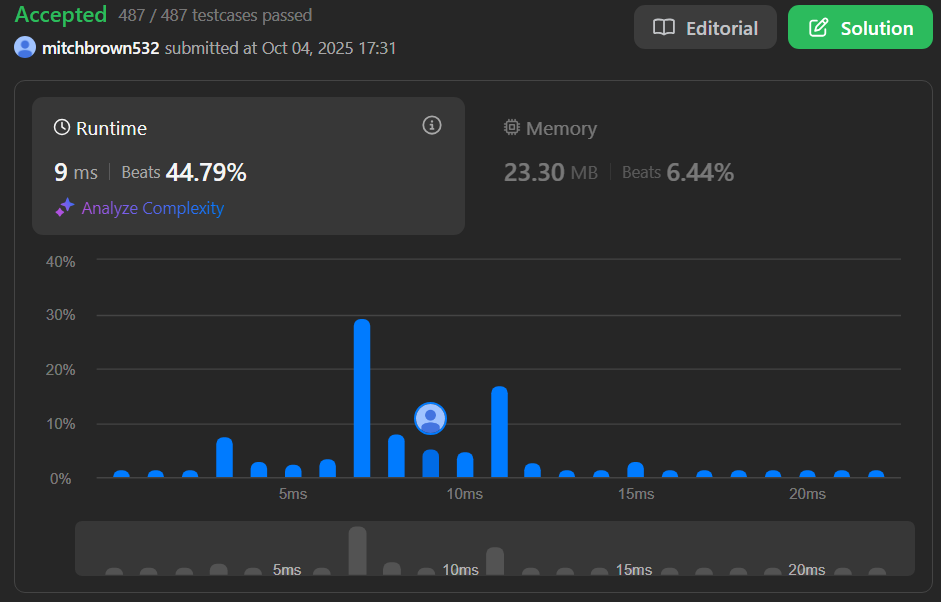

In [ ]:
# Solution 2: Also avoids regex and creating reversed string. Still uses a 2-pointer solution.
# Better runtime & memory. This is b/c I am cleaning while traversing - prevents unneccesary operations (runtime) & extra data being stored during cleaning (memory)
class Solution:
    def isPalindrome(self, s: str) -> bool:
        # Setting indexes for the pointers
        i, j = 0, len(s) - 1
        
        # Breaks as soon as the pointers meet 
        while i < j:
            # Skip anything not alphanumeric
            while i < j and not s[i].isalnum(): i += 1
            while i < j and not s[j].isalnum(): j -= 1
           
            # Compare & continue iterating
            if s[i].lower() != s[j].lower():
                return False
            i += 1
            j -= 1
            
        return True

Results:

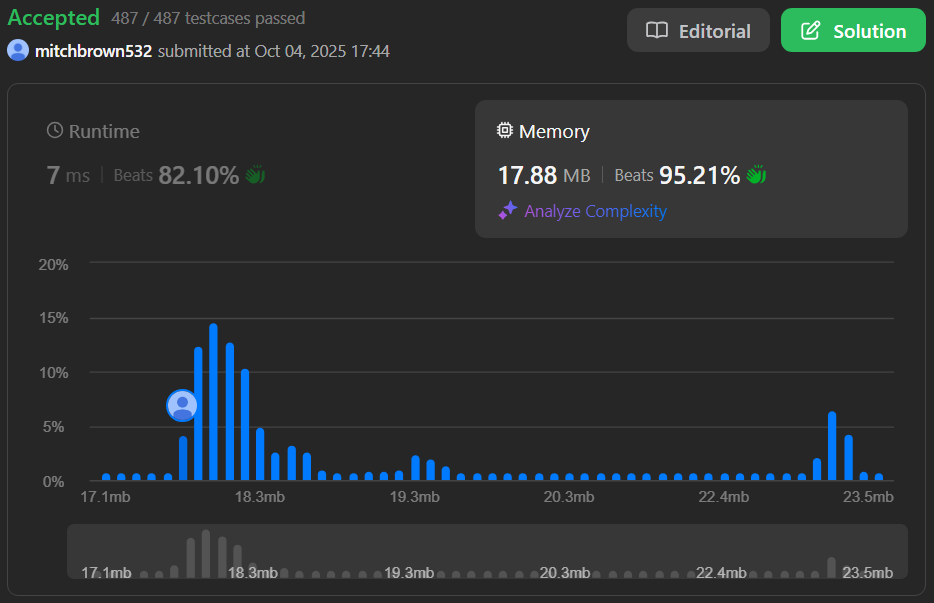

In [ ]:
# Solution 3: Used regex (faster since it's written in C) and a reversed string. 
# Performs better for runtime but worse for memory (creating & storing the reversed string)
# This is a C-optimized solution - doesn't actually use two pointers but it runs faster.

import re

CLEAN = re.compile(r'[^A-Za-z0-9]+')  # precompile for speed

class Solution:
    def isPalindrome(self, s: str) -> bool:
        # Remove non-alphanumerics in one C-optimized go, then compare to reverse
        s = CLEAN.sub('', s.lower())

        #print(s)
        
        return s == s[::-1]

Results:

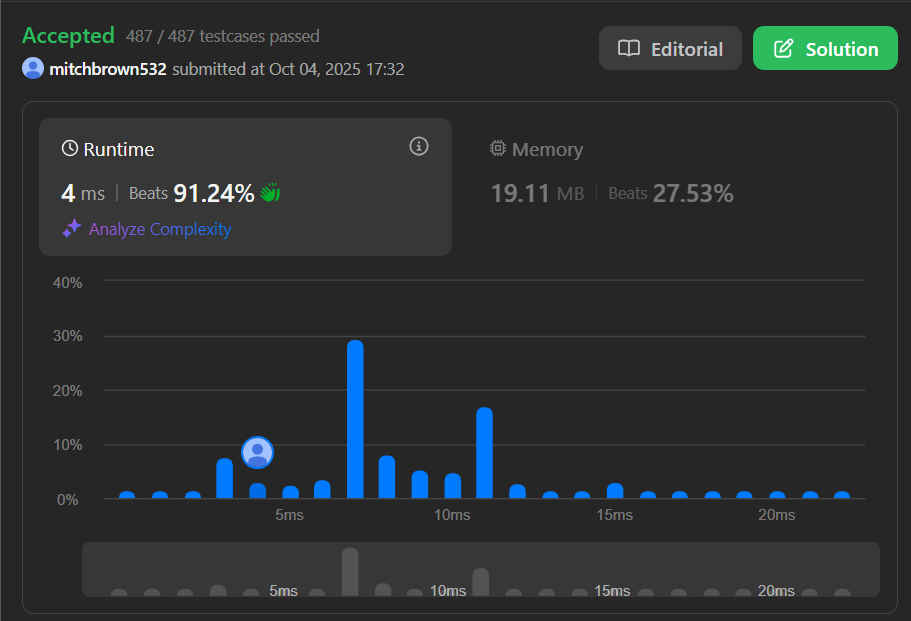